In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("subscription_periods.csv", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CUSTOMER_ID      5063 non-null   object
 1   SUBSCRIPTION_ID  5063 non-null   object
 2   PLAN_ID          5063 non-null   object
 3   START_DATE       5063 non-null   object
 4   END_DATE         5063 non-null   object
 5   MONTHLY_AMOUNT   5063 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 237.5+ KB


In [3]:
df['START_DATE'] =  df['START_DATE'].astype('datetime64')
df['END_DATE']   =  df['END_DATE'].astype('datetime64')
df.head(3)

,CUSTOMER_ID,SUBSCRIPTION_ID,PLAN_ID,START_DATE,END_DATE,MONTHLY_AMOUNT
0,5a5fb065a009845d76039464312c2b975b91b93c989b0f...,47e971fe9b6970ebf7c35cae4c5444c6fc8928ea744ec8...,app_pro_12,2020-04-21,2050-01-01,126
1,e2cc335334e07321a07679eadc613e176548d3de73d5a1...,7ab78cb6c03b26648e648684db1dc3973ab86807c2db4b...,app_enterprise,2020-05-09,2050-01-01,95
2,2ec077da17c6fc8cddb7fd31ed3f783781d0bc1e9d7e7a...,4c7634e09586b1b000fd49f62d32e8658f40cdeeff9206...,app_pro_24,2020-06-15,2050-01-01,114


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CUSTOMER_ID      5063 non-null   object        
 1   SUBSCRIPTION_ID  5063 non-null   object        
 2   PLAN_ID          5063 non-null   object        
 3   START_DATE       5063 non-null   datetime64[ns]
 4   END_DATE         5063 non-null   datetime64[ns]
 5   MONTHLY_AMOUNT   5063 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 237.5+ KB


In [5]:
#Is there duplicates on Customer_id? 
df[df['CUSTOMER_ID'].duplicated(keep='first') ==True].head(3)

,CUSTOMER_ID,SUBSCRIPTION_ID,PLAN_ID,START_DATE,END_DATE,MONTHLY_AMOUNT
55,dbbdbf4df3c35f78ec4e3f30280718eca1d2e3ee310a5f...,fcb865fb8764e5f77a1c42b202a5446856f4e874143deb...,app_pro_12,2020-07-22,2050-01-01,880
61,8fe4a11302340622fa4fbcd43f5f24cc1b64c7e0a9044b...,ad9c60fe3b97e507a3d9f92a96a03895b6d65a192f659e...,app_pro,2020-08-04,2050-01-01,1508
62,800064c929169245352b62948a191687a23bea1e9897d7...,acdd86699dad8b3f73190153d9689aea94c0643fd5fe85...,app_pro,2020-03-30,2020-06-09,2262


In [6]:
#Show the top duplicators
df.groupby("CUSTOMER_ID").count()[df.groupby("CUSTOMER_ID").count()['PLAN_ID'] >4].sort_values('PLAN_ID', ascending=False)

,SUBSCRIPTION_ID,PLAN_ID,START_DATE,END_DATE,MONTHLY_AMOUNT
CUSTOMER_ID,,,,,
00c2d0254d533e10d6c7aa2d94b2481c621ff495e457e566d1f0ea7fe9fa82f9,11,11,11,11,11
cffd660c17ba2b56cece1d7ef8048bf52200701c95c87cdafd13aeb60e1c8801,7,7,7,7,7
9ef90e1b23dcf3865dd327b889e2c5261c944cf43b70c0281cc43dfeb42adfa4,6,6,6,6,6
fa1b366efd89a12cb9329096ed891190768f19e0db6649ecdc5c3b64ec55941c,6,6,6,6,6
89229713a76076a977da0e03e69aa1ac964c2aa5bf471d640eacbb2e2e34bd78,5,5,5,5,5
8fe4a11302340622fa4fbcd43f5f24cc1b64c7e0a9044b20e65301c6ccb5bccd,5,5,5,5,5
c527be60076e35bacfd20dd4596b98cf4a4120abda58b5ed0bda1269a9d6dc94,5,5,5,5,5
cd5d16c5a10bd78a176e07f7a629cd26fc28501929dab2c116e16590a5324e17,5,5,5,5,5
d373069c42210796145304377dc2879eb1f6d3d98a4d310c1d87a54f493abc48,5,5,5,5,5


In [7]:
#check second top duplicator
df[df["CUSTOMER_ID"] == 'cffd660c17ba2b56cece1d7ef8048bf52200701c95c87cdafd13aeb60e1c8801'].sort_values('START_DATE')

,CUSTOMER_ID,SUBSCRIPTION_ID,PLAN_ID,START_DATE,END_DATE,MONTHLY_AMOUNT
1092,cffd660c17ba2b56cece1d7ef8048bf52200701c95c87c...,4adb86c525ab4ddba1da42a6dd319b5145836e2ce4021c...,app_enterprise,2019-05-28,2019-06-28,95
1123,cffd660c17ba2b56cece1d7ef8048bf52200701c95c87c...,aea4d974a69289ea3c6307c0167cf827adee7dfd273f9e...,app_enterprise,2019-07-30,2019-08-31,95
4474,cffd660c17ba2b56cece1d7ef8048bf52200701c95c87c...,b3482835135c405c0efa6a8d0ccf66874a5a64177b8afa...,app_enterprise,2019-10-02,2019-11-02,95
2984,cffd660c17ba2b56cece1d7ef8048bf52200701c95c87c...,fa3f04b857630c555272457d264b45d5c46e72c62b157e...,app_enterprise,2020-04-24,2020-04-30,95
419,cffd660c17ba2b56cece1d7ef8048bf52200701c95c87c...,fa3f04b857630c555272457d264b45d5c46e72c62b157e...,app_enterprise,2020-04-30,2020-05-04,189
2336,cffd660c17ba2b56cece1d7ef8048bf52200701c95c87c...,fa3f04b857630c555272457d264b45d5c46e72c62b157e...,app_pro,2020-05-04,2020-06-24,302
308,cffd660c17ba2b56cece1d7ef8048bf52200701c95c87c...,fa3f04b857630c555272457d264b45d5c46e72c62b157e...,app_enterprise,2020-06-24,2050-01-01,95


In [8]:
#this shows that a customer can have several susbscriptions from which each subscription can have different plans
df[df["SUBSCRIPTION_ID"] == 'fa3f04b857630c555272457d264b45d5c46e72c62b157e6876487c6240fa7b2b']

,CUSTOMER_ID,SUBSCRIPTION_ID,PLAN_ID,START_DATE,END_DATE,MONTHLY_AMOUNT
308,cffd660c17ba2b56cece1d7ef8048bf52200701c95c87c...,fa3f04b857630c555272457d264b45d5c46e72c62b157e...,app_enterprise,2020-06-24,2050-01-01,95
419,cffd660c17ba2b56cece1d7ef8048bf52200701c95c87c...,fa3f04b857630c555272457d264b45d5c46e72c62b157e...,app_enterprise,2020-04-30,2020-05-04,189
2336,cffd660c17ba2b56cece1d7ef8048bf52200701c95c87c...,fa3f04b857630c555272457d264b45d5c46e72c62b157e...,app_pro,2020-05-04,2020-06-24,302
2984,cffd660c17ba2b56cece1d7ef8048bf52200701c95c87c...,fa3f04b857630c555272457d264b45d5c46e72c62b157e...,app_enterprise,2020-04-24,2020-04-30,95


---
## DATA CHECK
---

In [9]:
Check =pd.DataFrame([[df['CUSTOMER_ID'].duplicated().sum(),len(df.CUSTOMER_ID.unique())],[df['SUBSCRIPTION_ID'].duplicated().sum(),len(df.SUBSCRIPTION_ID.unique()) ]], columns=['Duplications_count','Unique_count'],index=['CUSTOMER_ID', 'SUBSCRIPTION_ID']) 
Check[["Unique_count", "Duplications_count"]]

,Unique_count,Duplications_count
CUSTOMER_ID,4446,617
SUBSCRIPTION_ID,4734,329


In [10]:
test = pd.DataFrame( data = [df.notnull().sum() , df.isna().sum() , ((df.isna().sum()/ df.count())*100)], index=["not null values","missing values", "percentage_missing"]).transpose()
test

,not null values,missing values,percentage_missing
CUSTOMER_ID,5063.0,0.0,0.0
SUBSCRIPTION_ID,5063.0,0.0,0.0
PLAN_ID,5063.0,0.0,0.0
START_DATE,5063.0,0.0,0.0
END_DATE,5063.0,0.0,0.0
MONTHLY_AMOUNT,5063.0,0.0,0.0


- There are duplications on subscriptions and customers_id, which is ok, this table is not the base table for either variable.
- There are no null values

### Lets check the Monthly amount distribution

In [11]:
df.MONTHLY_AMOUNT.describe()

count     5063.000000
mean       282.628876
std        932.240416
min          0.000000
25%         95.000000
50%        126.000000
75%        252.000000
max      46339.000000
Name: MONTHLY_AMOUNT, dtype: float64

In [13]:
from scipy.stats import iqr
iqr(df.MONTHLY_AMOUNT)

157.0

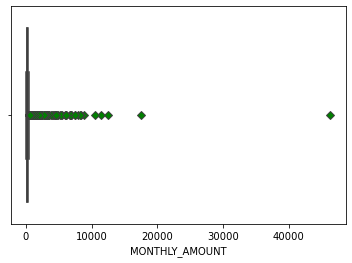

In [14]:
import seaborn as sns
green_diamond = dict(markerfacecolor='g', marker='D')
sns.boxplot(x=df.MONTHLY_AMOUNT,flierprops=green_diamond)

In [15]:
#what is the 95th and 97th percentile? 
print( "95th = ",df.MONTHLY_AMOUNT.quantile(0.95), "\n99th = ",round(df.MONTHLY_AMOUNT.quantile(0.97),0))

95th =  880.0 
99th =  1207.0


- There are considerable amounts of high values relative to the vast majority.
- In other words, after the (95th percentile the numbers go really high)

In [16]:
#Could there be a plan with no value? how many different plans have at least one monthly amount == 0? 
len(df[df["MONTHLY_AMOUNT"] == 0]["PLAN_ID"].unique().tolist())

16

In [17]:
#how many different plans there are? 
len(df.PLAN_ID.unique().tolist())

30

---
---

# Errors on data

In [18]:
# requette en SQL (one way to do it)
with 

base as 

(
select
	row_number() over() as indexo,
	*,
	 end_date -start_date +1 as subs_days
	from
	yousign.subs
)

select * from base
where subs_days <1

SyntaxError: invalid syntax (<ipython-input-18-308f8c9b4b4b>, line 2)

In [19]:
# sur pandas (another way to do it)
df[df['START_DATE']>df["END_DATE"]]

,CUSTOMER_ID,SUBSCRIPTION_ID,PLAN_ID,START_DATE,END_DATE,MONTHLY_AMOUNT
814,bccfd2339b2993520032c4cc42c489df8a4ccf862e9f77...,f85e8f601a49455ad550f6d97abee08cbecd93b0366daf...,api_extended_12,2020-05-25,2018-10-30,315
